# Neural Networks, Day 1

## Objectives

Morning Objectives
* Know the advantages and disadvantages of neural networks.
* Build a simple predictive neural network in keras.

Afternoon
* Explain the basic neural-network algorithms.
* Know ways to regularize a neural network.
* Build an autoencoder.

## Agenda

Morning

 * Overview
 * History
 * Introduction
 * Fully connected networks
 * Example in keras
 * Activation functions
 
Afternoon
 * Backpropagation
 * Regularization
 * Autoencoders

In [2]:
import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
import sklearn
from sklearn import preprocessing, model_selection
import tensorflow as tf
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import PIL

## What are Neural Networks?

Neural Networks were originally developed in the 1950's using the neurons in the brain as inspiration.

In the brain, we have neurons connected together by dendrons of different strengths, and these strength change as we learn. The connections are non-linear; a neural doesn't activate at all until it has sufficient input.

But don't get too caught up in the analogy. Brains are an inspiration, not a model, and trying to fit to closely to them hasn't always helped researchers.

### Terminology

I'm using the term *neural network* throughout the lecture. The term *deep learning* has become popular as well in recent years, in part to move away from the idea that these are based on the brain, and in part to emphasize the depth that's become possible. Sometimes people talk about *artificial neural networks* (ANN) to distinguish them from the biological ones. And a couple decades ago the terms *connectionism* and *parallel distributed processing* (http://cognet.mit.edu/book/parallel-distributed-processing) were popular.

I'll use the *neuron* or *node* to describe an individual value. *Perceptron* is another common term for the same concept.

## Why Neural Networks?

In general, neural networks perform well with high-dimensional data such as images, audio, and text.

Disadvantages

 * Hard to design and tune
 * Seriously, really hard to design and tune
 * Slow to train
 * Uninterpretable
 * Easy to overfit (need a lot of data)
 
Advantages

 * Works well with high-dimensional data
 * Can find almost anything, when designed correctly
 * Online training


## History

Stage 1: ('50s-60s) Early understanding of the brain and development of computers ('40s-60s)

Stage 2: ('80s-'90s) Understanding of backpropagation, recognition that neural networks could be used for associative memory, first recurrent neural networks

Stage 3: (2005-) Growth of GPUs, better algorithms for training deep networks, more designs, more data

## Neural networks

A neural network can be expressed as a directed graph. The nodes of the graph are neurons. Neurons can either be **input**, **hidden**, or **output** neurons. The input nodes are set to the feature, and (once all the calculations are done) the value of the output nodes will be the predicted labels.

The connections between the neurons are either **weights** or **activation functions**. If the connections into a neuron are weights, then the value for that neuron is the sum over all incoming connects of the weight times the value of the previous neuron.

<img src="img/2-1.png" alt="1-layer network" style="height: 180px;"/>

Here we have two input nodes ($x_1$ and $x_2$), a single output node ($y$), and weights between them ($W_1$ and $W_2$). So here

$$y = W_1 x_1 + W_2 x_2$$

Question: does that look familiar?

To find the best values for the weights, we need to train the model. This is done with some sort of gradient descent to minimize the error in predicting the training data. In this case we might define the error (the *loss function*) as the sum of squares of the difference of actual and predicted values of y.

The other option for a connection is an activation function. Here the value of a node is simply some fixed function of the of the previous node. There are a number of common ones; one of these is a the logistic function. Sometimes the term sigmoid function is used instead, though some (i.e., myself) use "sigmoid" to mean any function that sort of looks like that.

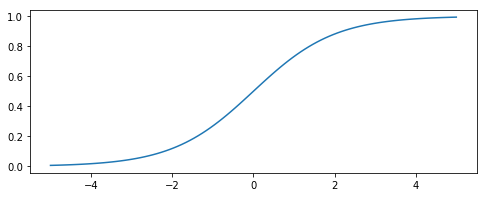

In [3]:
def logistic(x):
    return 1/(1+np.exp(-x))

xpts = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(xpts, logistic(xpts))

Let's add that in, along with a constant intercept term.

<img src="img/2-1-logit.png" alt="1-layer network" style="height: 300px;"/>

We could write that as

$$y = \frac{1}{1 + e^{-(W_1 x_1 + W_2 x_2 + b)}}$$

Question: does that look familiar?

Again, to find the best weights we use something like gradient descent, though if we want to use it to predict something is in one class or another, we'd use log loss (a.k.a. cross entropy) as our loss function.

Question: could we use accuracy as a loss function?

### Hidden layers

So far we haven't done anything new. Neural networks are more powerful if we introduce additional layers.

<img src="img/2-2-1-logit.png" alt="2-layer network" style="height: 400px;"/>

The nodes $h_1$ and $h_2$ are called hidden nodes.
Now we have a bunch of terms to fit, weights for each connection plus intercept terms.

For a neural network to play around with, look at https://playground.tensorflow.org

Discussion: Why did we add those logistic functions in the middle of the network? What if we hadn't included them?

## Fully Connected Networks

Much of the challenge of creating neural networks is deciding how to organize the nodes. The simplest type is called a **fully connected network**, in which nodes are organized into layers. Each layer (after the input) is a fully connected layer, with each of its nodes connected to the each node in the previous. Each layer may have an associated activation function, which is used for each node in the layer.

The more hidden layers a network has, the more powerful it is and the more it can predict. But it will also be slower to train and easier to overfit.

Let's make a simple  neural network in keras on some data we can understand. Usually neural networks are used for fancier stuff, but this is just a simple 1-feature regression problem.

In [4]:
npts = 500
x_train = stats.uniform(-5, 10).rvs(npts)
y_train = np.sin(x_train) + stats.norm(0, 1.0).rvs(npts)

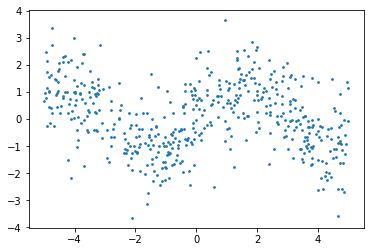

In [5]:
fig,ax = plt.subplots()
ax.scatter(x_train, y_train, s=3)

The basic object in keras is called a `model`; you create a model first and add layers onto it. The simplest one to use is a `Sequential` model, which is just a bunch of layers. Let's make one of those.

In [6]:
model = Sequential()

To start off we'll make the simplest network we can, without any hidden layers, just a single output layer. We need to specify the number of `units` in that layer (1) as well as the number of input units with `input_dim` (also 1).

In [7]:
model.add(Dense(units=1, input_dim=1))

That's it - we built a neural network! Now we compile it (specifying `loss` function and other things).

In [8]:
model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

Finally, we fit the model. We train the data in batches of multiple points at once, running through the entire dataset (epochs) several times.

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
500/500 [==============================] - 0s 639us/step - loss: 4.6618 - acc: 0.0000e+00
Epoch 2/5
500/500 [==============================] - 0s 74us/step - loss: 1.5247 - acc: 0.0000e+00
Epoch 3/5
500/500 [==============================] - 0s 89us/step - loss: 1.5111 - acc: 0.0000e+00
Epoch 4/5
500/500 [==============================] - 0s 69us/step - loss: 1.5093 - acc: 0.0000e+00
Epoch 5/5
500/500 [==============================] - 0s 79us/step - loss: 1.5098 - acc: 0.0000e+00


Let's make a picture!

Our data only range from -5 to 5, but we'll plot a bit beyond that. We'll make a function since we'll do this a few times.

In [10]:
def plot_results(model, ax=None, function=np.sin, xlim=(-7, 7),  data_lim=(-5, 5)):
    x_actual = np.linspace(*xlim, 500)
    y_actual = function(x_actual)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 5))

    y_pred = model.predict(x_actual)
    ax.plot(x_actual,y_pred, 'r-', label='model predictions')
    ax.plot(x_actual,y_actual, 'b-', lw=0.3, label='actual expected values')

    ax.axvline(data_lim[0], color='k', label='limits of data')
    ax.axvline(data_lim[1], color='k')
    ax.set_xlim(xlim)
    ax.legend()  

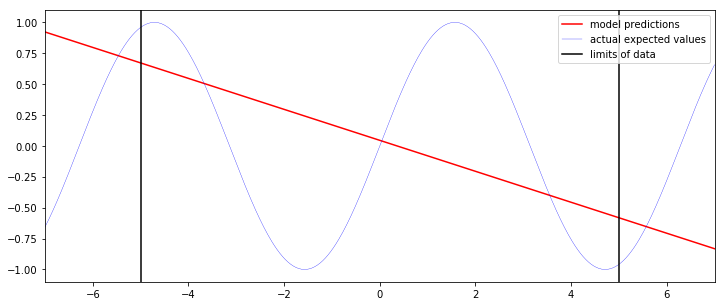

In [13]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model, ax=ax)
#ylim = ax.get_ylim()
#ax.scatter(x_train, y_train, s=3, label='data')
#ax.set_ylim(ylim)
#ax.legend()

So we basically just did linear regression.

Let's make a new model.

In [18]:
model_hidden_layer = Sequential()

Now we'll add a layer to it, taking us from a single input unit to 5 hidden units.

In [19]:
n_hidden = 5
model_hidden_layer.add(Dense(units=n_hidden, input_dim=1))

A second layer will connect use to the output with a single output value. Note we do not need to specify the `input_dim` since it's inferred from the previous layer.

In [20]:
model_hidden_layer.add(Dense(units=1))

We then compile the model and fit it, as before, and plot the results.

Epoch 1/5
500/500 [==============================] - 0s 272us/step - loss: 1.6557 - acc: 0.0000e+00
Epoch 2/5
500/500 [==============================] - 0s 78us/step - loss: 1.5184 - acc: 0.0000e+00
Epoch 3/5
500/500 [==============================] - 0s 82us/step - loss: 1.5117 - acc: 0.0000e+00
Epoch 4/5
500/500 [==============================] - 0s 79us/step - loss: 1.5143 - acc: 0.0000e+00
Epoch 5/5
500/500 [==============================] - 0s 77us/step - loss: 1.5062 - acc: 0.0000e+00


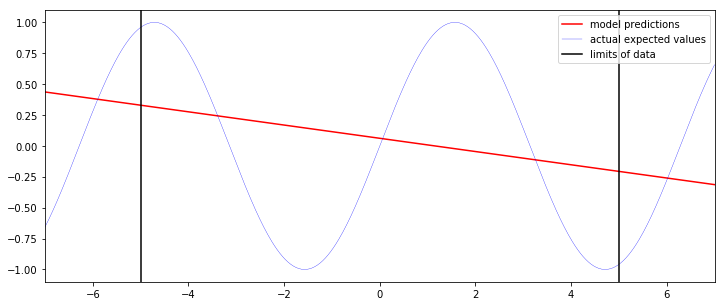

In [21]:
model_hidden_layer.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])
model_hidden_layer.fit(x_train, y_train, epochs=5, batch_size=32)
fig, ax = plt.subplots(figsize=(12,5))
plot_results(model_hidden_layer, ax=ax)

That was disappointing.

What went wrong?

## Introducing non-linearity

The problem is that our network is completely linear, so no matter what the weights the output is a linear function of the input. In order to fix this, we need to provide some sort of non-linear function at each of the layers.

Above we used a logistic function for our activation function. In the past that was the most popular activation function, for a couple reasons. First, it's differentiable everywhere. Second, the finite range was seen as a model for the activation of neurons in the brain. Both of these were seen as Good Things.

It turns out neither was that important, and today the ReLU function is generally more popular.

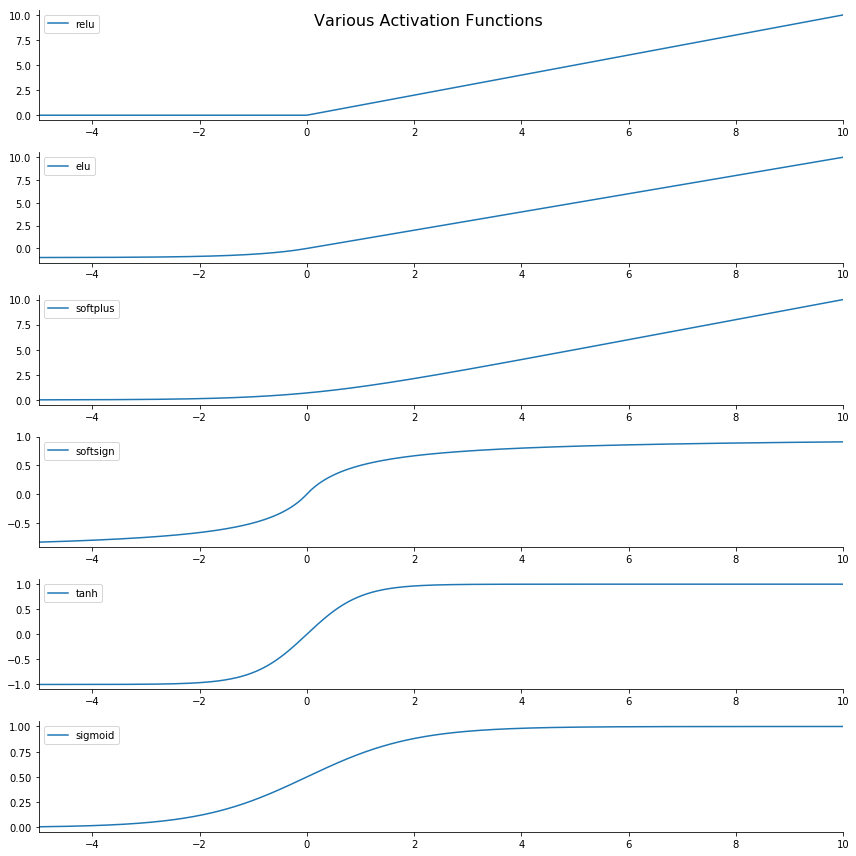

In [22]:
xpts = np.linspace(-5, 10, 500)
sess = tf.InteractiveSession()
functions = [keras.backend.relu,
             keras.backend.elu,
             keras.backend.softplus,
             keras.backend.softsign,
             keras.backend.tanh,
             keras.backend.sigmoid            ]

fig,axes = plt.subplots(len(functions), figsize=(12,12))

for ax, func in zip(axes, functions):
    ax.plot(xpts, func(xpts).eval(), label=func.__name__)
    ax.legend(loc='upper left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(xpts.min(), xpts.max())

fig.suptitle('Various Activation Functions', fontsize=16)
fig.tight_layout()

### Activation units

To add an activation function in keras, we just add it as an additional layer.


In [23]:
model_activation = Sequential()
n_hidden = 5
model_activation.add(Dense(units=n_hidden, input_dim=1))
model_activation.add(Activation('relu'))
model_activation.add(Dense(units=1))
model_activation.compile(loss='mean_squared_error',
             optimizer='adam')

In [24]:
model_activation.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
500/500 [==============================] - 0s 459us/step - loss: 5.6805
Epoch 2/10
500/500 [==============================] - 0s 102us/step - loss: 4.9847
Epoch 3/10
500/500 [==============================] - 0s 118us/step - loss: 4.3672
Epoch 4/10
500/500 [==============================] - 0s 97us/step - loss: 3.8569
Epoch 5/10
500/500 [==============================] - 0s 109us/step - loss: 3.4162
Epoch 6/10
500/500 [==============================] - 0s 103us/step - loss: 3.0371
Epoch 7/10
500/500 [==============================] - 0s 100us/step - loss: 2.7282
Epoch 8/10
500/500 [==============================] - 0s 100us/step - loss: 2.4653
Epoch 9/10
500/500 [==============================] - 0s 94us/step - loss: 2.2505
Epoch 10/10
500/500 [==============================] - 0s 84us/step - loss: 2.0754


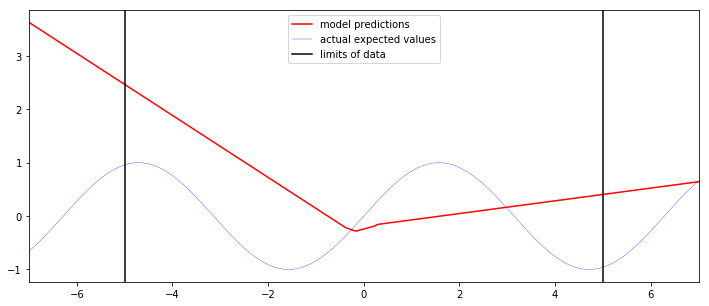

In [25]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)

# Afternoon Lecture

## Backpropagation

We've glossed over how you actually train the network
Calculating the output based on the inputs is sometimes called **forward propagation**, in which the signal is propagated from one layer to the next. To update the weights in the model we use an algorithm called **backpropagation**. In this, we compare the predicted output with the expected value for a set of inputs to find the output error, and propagate the error backwards, from one layer to the previous one, based on the gradient of the intervening functions and weights. Once we have the error at each node we can use gradient descent or some related algorithm to adjust the weights at that node.

We aren't going to do that manually, but if you're interested Jeff's lecture at https://github.com/zipfian/DSI_Lectures/blob/master/neural-network/jfomhover/Perceptron%20-%20Notes%20-%20v3.ipynb does a great job exploring that in more detail. TensorFlow (or any other NN framework) all take care of that automatically.

That said, it's an important algorithm that was critical to the development of NN and at some point it's worth studying.

## Regularization

Since neural networks (particularly fully connected networks) have a large number of parameters, they are fairly easy to overfit. This is most serious in situations in which we have more features than data.

Question: is that the case here?

Question: what's an example of such a problem?

To avoid this most neural networks include some sort of regularization. One approach is the same sort of L1 or L2 regularization used in linear and logistic regression. Another approach is dropout.

### Dropout

The most popular approach is adding dropout layers. A dropout layer has no effect during prediction, acting like an identity matrix, but during training causes nodes to fail randomly. This forces the network to include redundancy.

It won't make much of a different here, but this is what it would look like in keras.

In [61]:
npts = 20
x_train = np.linspace(-5, 5, npts)
y_train = np.sin(x_train) + stats.norm(0, 1.0).rvs(npts)

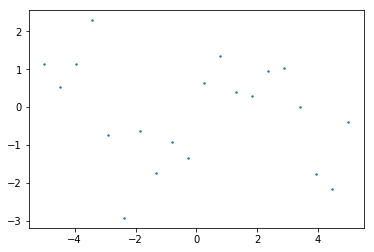

In [62]:
fig,ax = plt.subplots()
ax.scatter(x_train, y_train, s=2)

In [74]:
model_activation = Sequential()
n_hidden = 50
model_activation.add(Dense(units=n_hidden, input_dim=1, activation='relu'))
model_activation.add(Dense(units=1))
model_activation.add(Dropout(rate=0.5))
model_activation.compile(loss='mean_squared_error',
             optimizer='sgd')

In [77]:
model_activation.fit(x_train, y_train, epochs=5000, batch_size=10, verbose=0)

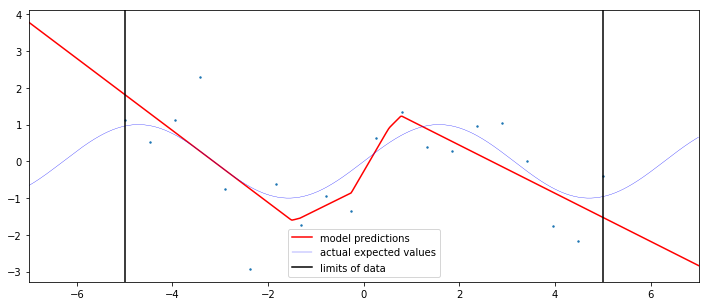

In [78]:
fig,ax = plt.subplots(figsize=(12,5))
plot_results(model_activation, ax=ax)
ax.scatter(x_train, y_train, s=2)

## Autoencoders

An autoencoder a unsupervised learning model to create a low-dimensional representation of data. We'll do this by creating a multi-layer network, with one of the hidden layers having a small number of nodes.

Think of this like PCA, but better because it learns the overall structure of the data rather than just looking in the directions in which things vary the most.

There are a couple reasons we might want to create a low-dimensional representation. One, we might want to visualize data. It's hard to visualize high-dimensional data; reducing it to two important dimensions helps.

Second, we might want to remove noise, focusing on the features in which the data varies. There are reasons to be skeptical of this, as discussed in the PCA lectures, but autoencoders are generally better than PCA.

To start we'll use some data from two thousand recipes of cookies, pastries, and pizzas. The features are ingredients: 1 if the ingredient is present in the recipe, 0 if it isn't.

In [80]:
cookies = pd.read_excel('data/cookieclassifier_data_matrix.xlsx')

In [81]:
cookies.head()

,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,tortillas,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini
Cookies,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
Cookies,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [82]:
X = cookies.values
y = cookies.index

In [83]:
y.value_counts()

Cookies     803
Pastries    688
Pizzas      440
dtype: int64

In [84]:
X.shape

(1931, 133)

In [85]:
le = preprocessing.LabelEncoder()
le.fit(y)

y_numeric = le.transform(y)
y_labels = le.transform(le.classes_)

In [86]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y_numeric,
                                                                    test_size=0.3)

In [87]:
model = Sequential()
model.add(Dense(60,  activation='relu', input_shape=(133,)))
model.add(Dense(40,  activation='relu'))
model.add(Dense(20,  activation='relu'))
model.add(Dense(2,    activation='linear', name="bottleneck"))
model.add(Dense(20,  activation='relu'))
model.add(Dense(40,  activation='relu'))
model.add(Dense(60,  activation='relu'))
model.add(Dense(133,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer = 'adam')


In [88]:
history = model.fit(X_train, X_train,
                    batch_size=128,
                    epochs=100,
                    verbose=0, 
                    validation_data=(X_test, X_test))

In [89]:
encoder = Model(model.input, model.get_layer('bottleneck').output)
z_enc = encoder.predict(X_train)  # bottleneck representation
r_enc = model.predict(X_train)        # reconstruction

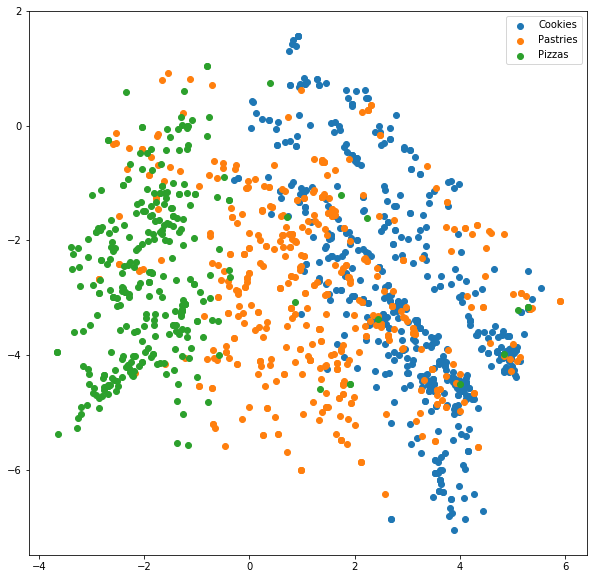

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

for label, class_name in zip(y_labels, le.classes_):
    z0 = z_enc[:, 0][y_train == label]
    z1 = z_enc[:, 1][y_train == label]
    ax.scatter(z0, z1, label=class_name)
ax.legend()